In [ ]:
!pip install allensdk
!pip install giotto-tda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.3 MB/s 
     |████████████████████████████████| 185 kB 50.2 MB/s 
     |████████████████████████████████| 115 kB 55.6 MB/s 
     |████████████████████████████████| 668 kB 52.8 MB/s 
     |████████████████████████████████| 1.3 MB 34.9 MB/s 
     |████████████████████████████████| 26.5 MB 9.2 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 3.0 MB 31.3 MB/s 
     |████████████████████████████████| 130 kB 46.5 MB/s 
     |████████████████████████████████| 48.4 MB 18 kB/s 
     |████████████████████████████████| 3.4 MB 29.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 130 kB 67.7 MB/s 
     |████████████████████████████████| 4.3 MB 48.9 MB/s 
     |███████████████████

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
from scipy.stats import binned_statistic
import seaborn as sns
import matplotlib.pyplot as plt
from gtda.time_series import SingleTakensEmbedding
from gtda.homology import VietorisRipsPersistence
from sklearn.decomposition import PCA

Creating Ecephys Project Cache Object

In [ ]:
manifest_path = os.path.join('/content','manifest.json')
cache = EcephysProjectCache.from_warehouse(manifest = manifest_path)
print(cache.get_all_session_types)

<bound method EcephysProjectCache.get_all_session_types of <allensdk.brain_observatory.ecephys.ecephys_project_cache.EcephysProjectCache object at 0x7f9ec14dc9d0>>


In [ ]:
sessions = cache.get_session_table()
#sessions = pd.read_csv('sessions.csv')

KeyboardInterrupt: ignored

Getting session data

In [ ]:
session_id = 715093703
#session_analysis = pd.read_csv('session_715093703_analysis_metrics.csv') 
session = cache.get_session_data(session_id)
# session is an object type data

Downloading:   0%|          | 0.00/2.86G [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/hdmf/utils.py:577: FutureWarning: DynamicTable.__init__: Using positional arguments for this method is discouraged and will be deprecated in a future major release. Please use keyword arguments to ensure future compatibility.
  warnings.warn(msg, FutureWarning)


The type of session is not pandas dataframe its in form of ecephys session

In [ ]:
session.stimulus_names

/usr/local/lib/python3.7/dist-packages/hdmf/utils.py:577: FutureWarning: DynamicTable.__init__: Using positional arguments for this method is discouraged and will be deprecated in a future major release. Please use keyword arguments to ensure future compatibility.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/hdmf/utils.py:577: FutureWarning: DynamicTable.__init__: Using positional arguments for this method is discouraged and will be deprecated in a future major release. Please use keyword arguments to ensure future compatibility.
  warnings.warn(msg, FutureWarning)


['spontaneous',
 'gabors',
 'flashes',
 'drifting_gratings',
 'natural_movie_three',
 'natural_movie_one',
 'static_gratings',
 'natural_scenes']

In [ ]:
units = session.units
units

/usr/local/lib/python3.7/dist-packages/hdmf/utils.py:577: FutureWarning: DynamicTable.__init__: Using positional arguments for this method is discouraged and will be deprecated in a future major release. Please use keyword arguments to ensure future compatibility.
  warnings.warn(msg, FutureWarning)


,snr,presence_ratio,waveform_spread,cumulative_drift,isolation_distance,waveform_amplitude,firing_rate,nn_hit_rate,isi_violations,waveform_velocity_below,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
950910352,2.816993,0.99,60.0,419.57,69.455405,106.785900,4.532385,0.935531,0.029797,0.000000,...,215.0,APN,8157.0,3521.0,6697.0,probeA,See electrode locations,29999.954846,1249.998119,True
950910364,2.592082,0.99,60.0,231.42,102.847616,85.808775,31.486161,0.995333,0.005998,0.343384,...,215.0,APN,8154.0,3513.0,6698.0,probeA,See electrode locations,29999.954846,1249.998119,True
950910371,2.095077,0.99,70.0,209.31,76.907610,76.898055,17.328610,0.993333,0.005242,0.137353,...,215.0,APN,8146.0,3487.0,6701.0,probeA,See electrode locations,29999.954846,1249.998119,True
950910392,3.024744,0.99,70.0,179.71,65.671206,120.519555,16.262414,0.944000,0.096884,-0.274707,...,215.0,APN,8133.0,3444.0,6707.0,probeA,See electrode locations,29999.954846,1249.998119,True
950910435,2.067406,0.99,90.0,99.99,294.002222,66.974895,62.326305,1.000000,0.004243,-0.647523,...,215.0,APN,8110.0,3367.0,6719.0,probeA,See electrode locations,29999.954846,1249.998119,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950956911,1.689921,0.99,130.0,166.36,36.995342,91.264680,5.890958,0.370000,0.270592,0.068677,...,417.0,VISrl,7295.0,1020.0,8734.0,probeF,See electrode locations,30000.028033,1250.001168,True
950956870,5.216742,0.99,60.0,121.49,80.682448,311.723490,0.647343,0.985507,0.092982,0.000000,...,417.0,VISrl,7295.0,1020.0,8734.0,probeF,See electrode locations,30000.028033,1250.001168,True
950956845,3.841410,0.99,70.0,235.47,63.765826,137.348250,2.075303,0.938438,0.262364,0.068677,...,417.0,VISrl,7298.0,1031.0,8730.0,probeF,See electrode locations,30000.028033,1250.001168,True


In [ ]:
units.columns

Index(['snr', 'presence_ratio', 'waveform_spread', 'cumulative_drift',
       'isolation_distance', 'waveform_amplitude', 'firing_rate',
       'nn_hit_rate', 'isi_violations', 'waveform_velocity_below', 'L_ratio',
       'nn_miss_rate', 'waveform_halfwidth', 'waveform_repolarization_slope',
       'amplitude_cutoff', 'waveform_PT_ratio', 'silhouette_score',
       'waveform_recovery_slope', 'waveform_duration', 'local_index_unit',
       'max_drift', 'waveform_velocity_above', 'cluster_id', 'peak_channel_id',
       'd_prime', 'c50_dg', 'area_rf', 'fano_dg', 'fano_fl', 'fano_ns',
       'fano_rf', 'fano_sg', 'f1_f0_dg', 'g_dsi_dg', 'g_osi_dg', 'g_osi_sg',
       'azimuth_rf', 'mod_idx_dg', 'p_value_rf', 'pref_sf_sg', 'pref_tf_dg',
       'run_mod_dg', 'run_mod_fl', 'run_mod_ns', 'run_mod_rf', 'run_mod_sg',
       'pref_ori_dg', 'pref_ori_sg', 'run_pval_dg', 'run_pval_fl',
       'run_pval_ns', 'run_pval_rf', 'run_pval_sg', 'elevation_rf',
       'pref_image_ns', 'pref_phase_sg', 'firi

In [ ]:
type(units)

pandas.core.frame.DataFrame

Using units with High Signal to noise ration(snr)

In [ ]:
high_snr_units = units[units['snr']>3]
len(high_snr_units)

388

In [ ]:
Visual_cortex_units = units[(units['ecephys_structure_acronym']=='VISp') & (units['snr']>3)]

In [ ]:
type(Visual_cortex_units)

pandas.core.frame.DataFrame

In [ ]:
def plot_correlated_heatmap(stimulus_ids,unit_id,title='',time_step = 0.05):
  time_bins = np.arange(0.0,0.25+time_step,time_step)
  #Histogram is of xarray data set with 3 dimensions
  #Histograms has coordinates stimulus_presentaion_ids,time relative to stimulus onset , unit ids
  histogram = session.presentationwise_spike_counts(stimulus_presentation_ids=stimulus_ids,bin_edges = time_bins,unit_ids=unit_id )
  #compressing the data by taking mean along stimulus presentation id
  mean_histogram = histogram.mean(dim='stimulus_presentation_id')
  df = pd.DataFrame(data= np.array(mean_histogram),columns=[i for i in range(len(unit_id))])
  #print('time bins = ',df.shape[0])
  #plt.figure(figsize=(12,9))
  #plt.title(title)
  #sns.heatmap(data =df.corr() ,cmap="YlGnBu")
  return df


In [ ]:
natural_movie_one = session.get_stimulus_table('natural_movie_one')
natural_movie_three = session.get_stimulus_table('natural_movie_three')
static_grating_stimulus = session.get_stimulus_table('static_gratings')
natural_scenes_stimulus = session.get_stimulus_table('natural_scenes')
gabors_stimulus = session.get_stimulus_table('gabors')
drifting_gratings_stimulus = session.get_stimulus_table('drifting_gratings')
flashes_stimulus = session.get_stimulus_table('flashes')
spontaneous_stimulus = session.get_stimulus_table('spontaneous')

In [ ]:
#data for static grating 
spike_trains_grating = []
for i in range(len(Visual_cortex_units)):
  unit_id = Visual_cortex_units.index.values[i]
  spike_times = session.presentationwise_spike_times(stimulus_presentation_ids=static_grating_stimulus[(static_grating_stimulus['stimulus_block']==8)&(static_grating_stimulus['orientation']==0) ].index.values,unit_ids=unit_id)
  spike_trains_grating.append(spike_times.index.values)


/usr/local/lib/python3.7/dist-packages/allensdk/brain_observatory/ecephys/ecephys_session.py:1348: UserWarning: Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',Spikes within these intervals are invalid and may need to be excluded from the analysis.
  warnings.warn("Session includes invalid time intervals that could "
/usr/local/lib/python3.7/dist-packages/hdmf/utils.py:577: FutureWarning: DynamicTable.__init__: Using positional arguments for this method is discouraged and will be deprecated in a future major release. Please use keyword arguments to ensure future compatibility.
  warnings.warn(msg, FutureWarning)


In [ ]:
spike_trains_grating_orientation = []
orientation = [0,30,60,90,120,150]
for o in orientation:
  unit_id = Visual_cortex_units.index.values[1]
  spike_times = session.presentationwise_spike_times(stimulus_presentation_ids=static_grating_stimulus[ (static_grating_stimulus['stimulus_block']==8)&(static_grating_stimulus['orientation']==o) ].index.values,unit_ids=unit_id)
  spike_trains_grating_orientation.append(spike_times.index.values)

/usr/local/lib/python3.7/dist-packages/allensdk/brain_observatory/ecephys/ecephys_session.py:1348: UserWarning: Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',Spikes within these intervals are invalid and may need to be excluded from the analysis.
  warnings.warn("Session includes invalid time intervals that could "
/usr/local/lib/python3.7/dist-packages/hdmf/utils.py:577: FutureWarning: DynamicTable.__init__: Using positional arguments for this method is discouraged and will be deprecated in a future major release. Please use keyword arguments to ensure future compatibility.
  warnings.warn(msg, FutureWarning)


In [ ]:
spike_trains_grating_orientation[0]

array([5385.26324904, 5385.27621571, 5385.29151572, ..., 5861.58828553,
       5861.60445221, 5861.62171888])

In [ ]:
len(spike_trains_grating)

16

In [ ]:
for i in range(len(spike_trains_grating)):
  print(spike_trains_grating[i].shape)

(211,)
(4348,)
(439,)
(456,)
(4333,)
(1039,)
(207,)
(702,)
(1427,)
(787,)
(180,)
(211,)
(1144,)
(1829,)
(142,)
(52,)


In [ ]:
#data for drifting grating 
spike_trains_drifting_grating = []
for i in range(len(Visual_cortex_units)):
  unit_id = Visual_cortex_units.index.values[i]
  spike_times = session.presentationwise_spike_times(stimulus_presentation_ids=drifting_gratings_stimulus[drifting_gratings_stimulus['stimulus_block']==7].index.values,unit_ids=unit_id)
  spike_trains_drifting_grating.append(spike_times.index.values)


In [ ]:
len(spike_trains_drifting_grating)

16

In [ ]:
for i in range(len(spike_trains_drifting_grating)):
  print(spike_trains_drifting_grating[i].shape)

(2974,)
(27786,)
(7246,)
(5003,)
(15150,)
(9966,)
(411,)
(3729,)
(6740,)
(1596,)
(1247,)
(1813,)
(7502,)
(9166,)
(715,)
(114,)


In [ ]:
# data for gabors
spike_trains_gabors = []
for i in range(len(Visual_cortex_units)):
  unit_id = Visual_cortex_units.index.values[i]
  spike_times = session.presentationwise_spike_times(stimulus_presentation_ids=gabors_stimulus[gabors_stimulus['stimulus_block']==0].index.values,unit_ids=unit_id)
  spike_trains_gabors.append(spike_times.index.values)

In [ ]:
len(spike_trains_gabors)

16

In [ ]:
for i in range(len(spike_trains_gabors)):
  print(spike_trains_gabors[i].shape)

(230,)
(41898,)
(750,)
(1880,)
(37254,)
(1452,)
(1150,)
(3809,)
(12779,)
(1320,)
(6377,)
(2510,)
(17971,)
(9605,)
(440,)
(74,)


## TDA of Neural Spikes Data

In [ ]:
gabors_data = pd.read_csv('gabors_0_degree.csv')
gabors_data

,Unnamed: 0,gabors_0_degree
0,0,73.788726
1,1,73.820626
2,2,73.839193
3,3,73.875526
4,4,73.924193
...,...,...
13992,13992,984.942884
13993,13993,984.951584
13994,13994,984.974117
13995,13995,984.996151


In [ ]:
def plot_3d_projection(ts_embed, plot_title):
  embed_3dim = PCA(n_components = 3).fit_transform(ts_embed) if ts_embed.shape[1] > 3 else ts_embed
  if embed_3dim.shape[1] == 2:
    embed_3dim = np.concatenate((np.zeros((embed_3dim.shape[0], 1), dtype = float), embed_3dim), axis = 1)
  N = embed_3dim.shape[0]
  cmap = plt.get_cmap('bwr')
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(embed_3dim[:, 0], embed_3dim[:, 1], embed_3dim[:, 2], c = cmap((1.0/N)*np.arange(N)))
  plt.title(plot_title)
  plt.show()

def tda_analysis(ts_arr, ts_name):
  # Plotting the original time series
  cmap = plt.get_cmap('bwr')
  spike_intervals = np.diff(ts_arr, n = 1)
  N = spike_intervals.shape[0]
  plt.figure()
  plt.scatter(np.arange(spike_intervals.shape[0]), spike_intervals, s = 2, c = cmap((1.0/N)*np.arange(N)))
  plt.title(ts_name)
  plt.show()
  # Computing Takens embedding and plotting its 3d projection
  ts_embed = SingleTakensEmbedding(dimension = 5).fit_transform(spike_intervals)
  print('Dimension = {}'.format(ts_embed.shape[1]))
  plot_3d_projection(ts_embed, ts_name)
  # Computing persistent homology and plotting the persistence diagram
  #persis = VietorisRipsPersistence(homology_dimensions = [0], n_jobs = 1).fit_transform_plot(ts_embed.reshape(1, *ts_embed.shape))
  #plt.show()


In [ ]:
## Drifting Grating
tda_analysis(spike_trains_drifting_grating, 'Spike Trains Drifting')

NameError: ignored

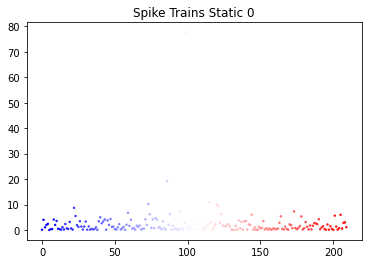

Dimension = 4


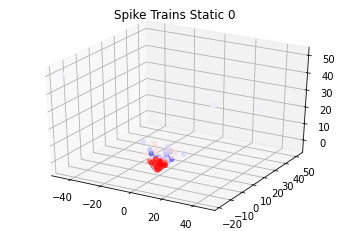

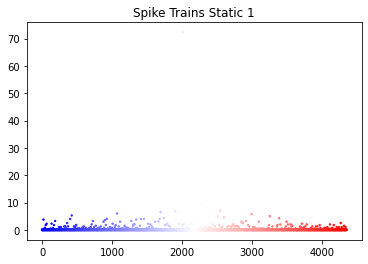

Dimension = 5


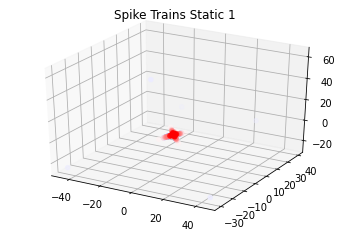

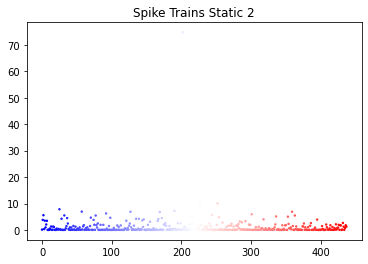

Dimension = 5


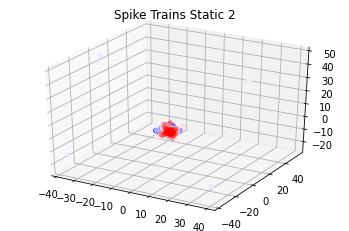

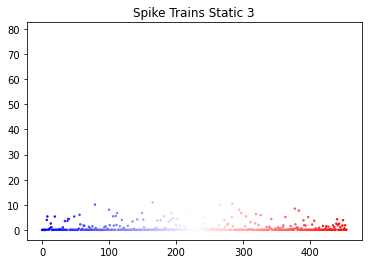

Dimension = 4


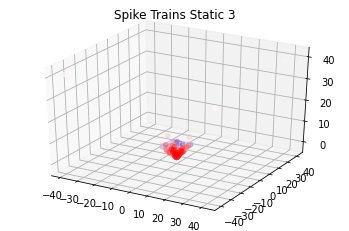

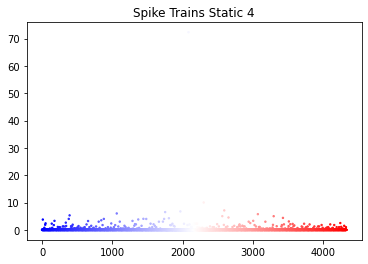

Dimension = 5


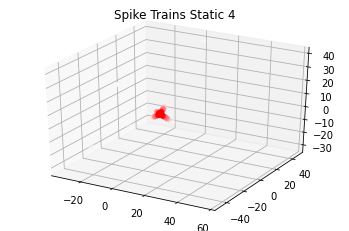

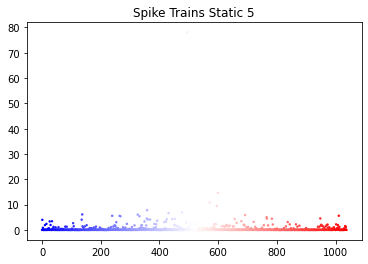

Dimension = 4


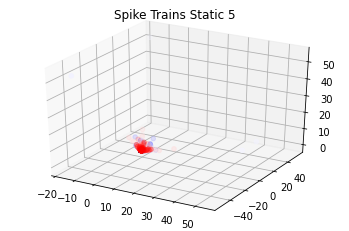

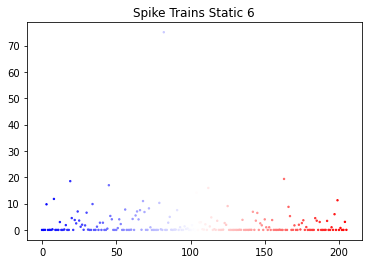

Dimension = 3


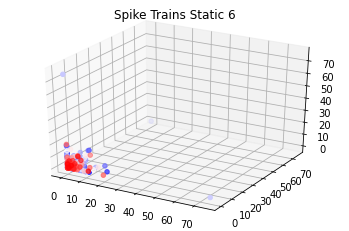

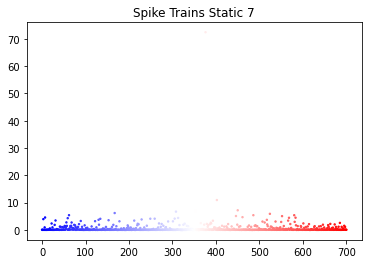

Dimension = 4


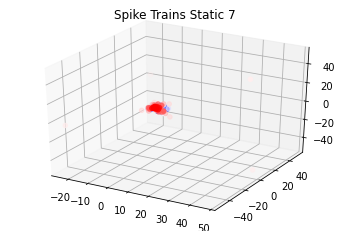

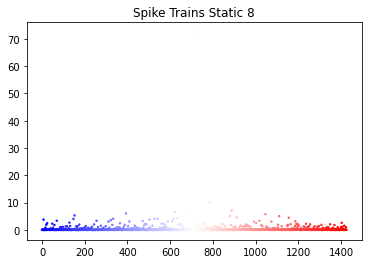

Dimension = 4


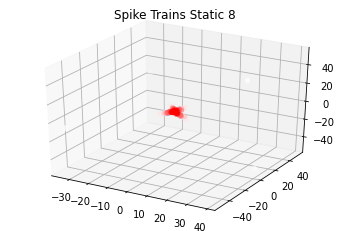

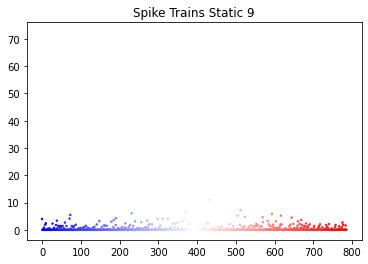

Dimension = 5


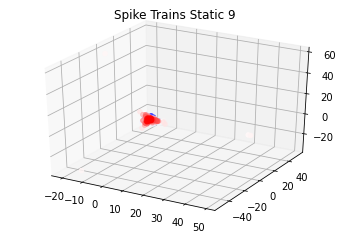

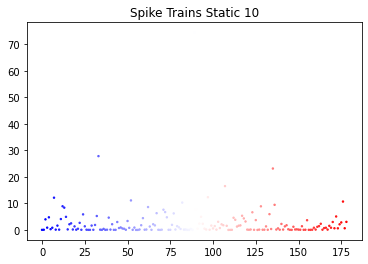

Dimension = 3


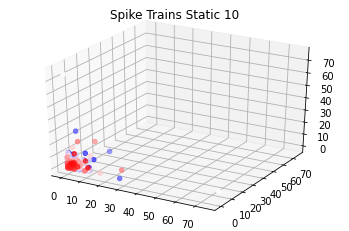

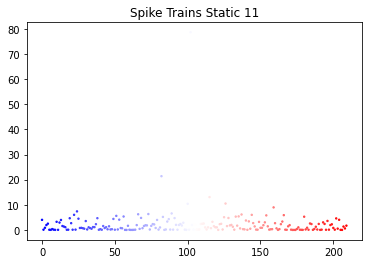

Dimension = 4


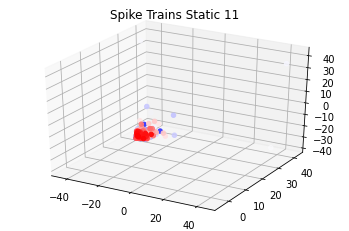

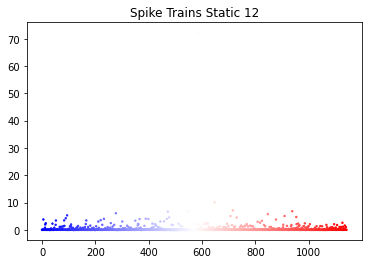

Dimension = 4


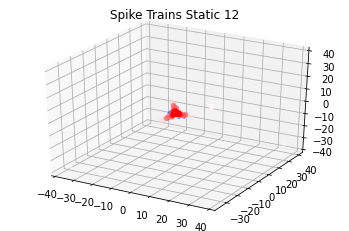

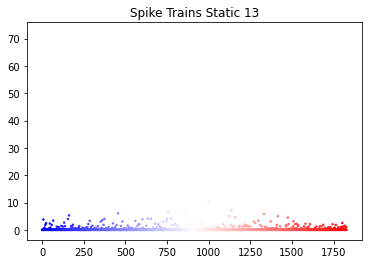

Dimension = 5


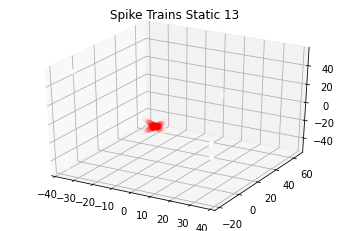

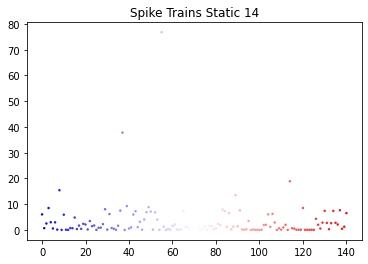

Dimension = 4


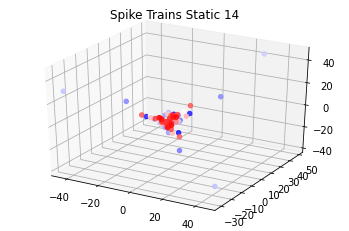

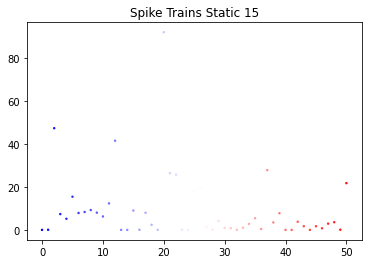

Dimension = 3


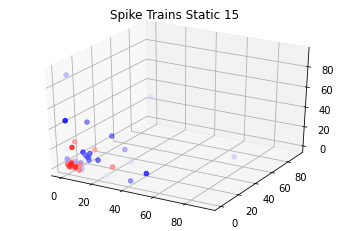

In [ ]:
# Static Grating
tda_analysis(spike_trains_grating, 'Spike Trains Static')

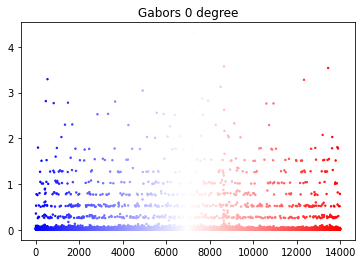

Dimension = 5


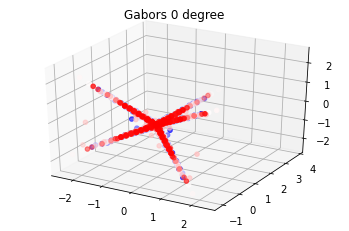

In [ ]:
tda_analysis(np.array(gabors_data['gabors_0_degree']), 'Gabors 0 degree')

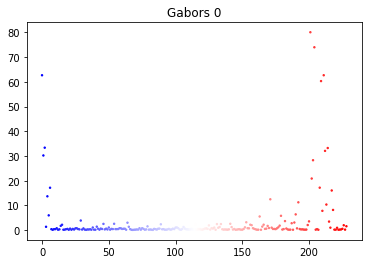

Dimension = 5


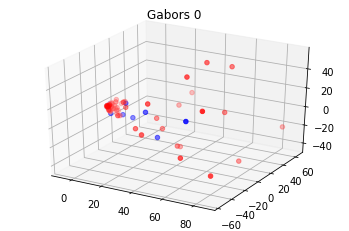

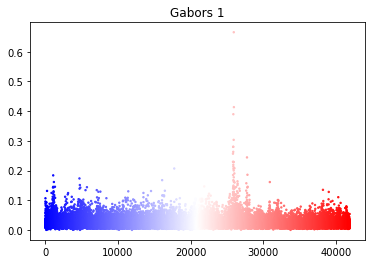

Dimension = 2


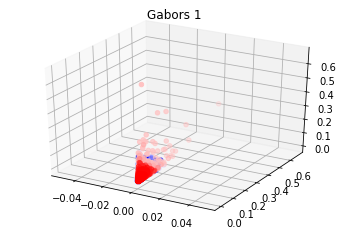

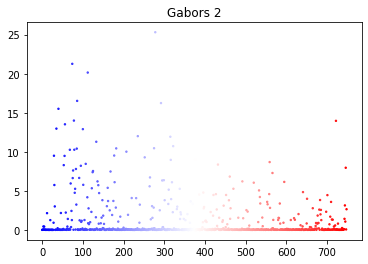

Dimension = 4


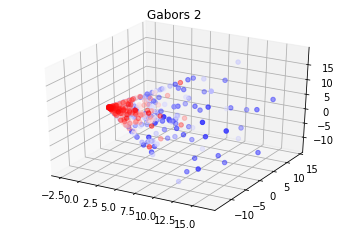

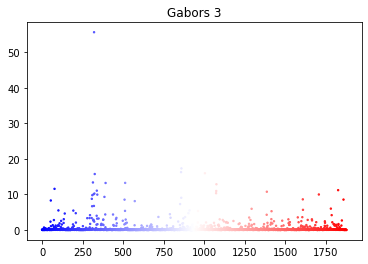

Dimension = 5


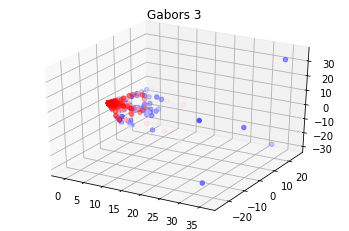

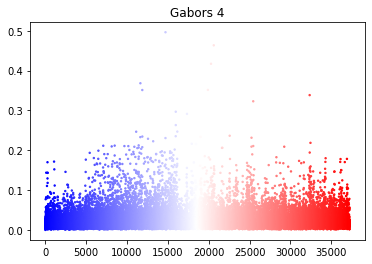

Dimension = 2


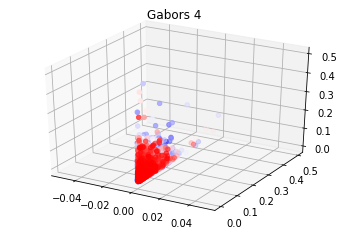

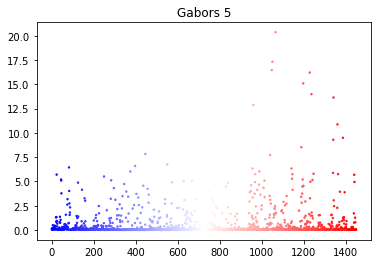

Dimension = 4


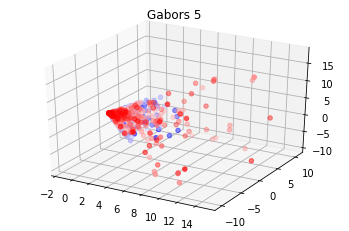

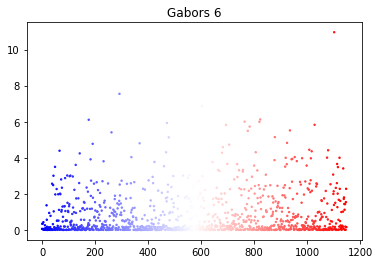

Dimension = 2


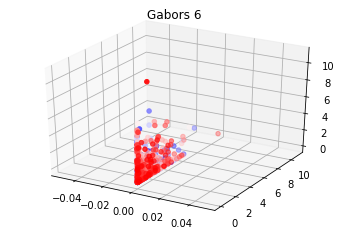

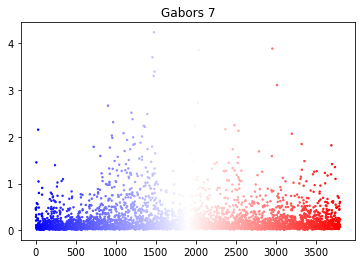

Dimension = 5


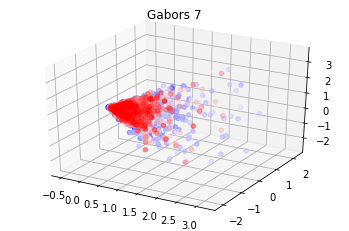

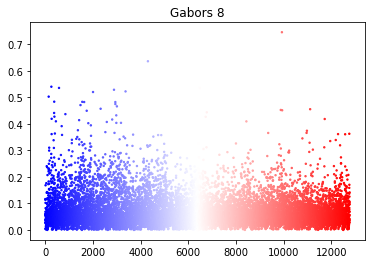

Dimension = 5


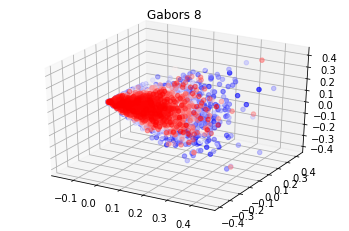

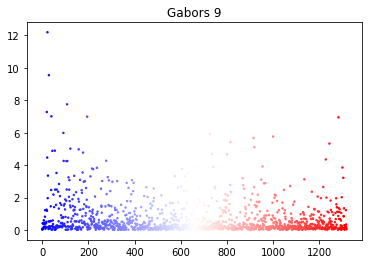

Dimension = 4


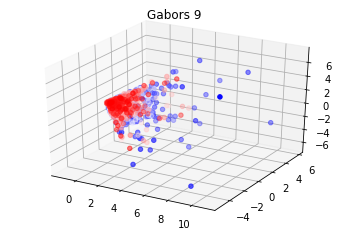

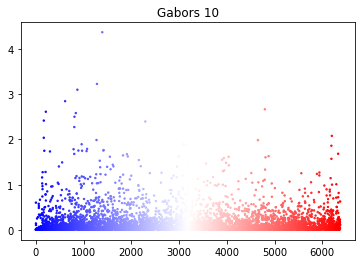

Dimension = 5


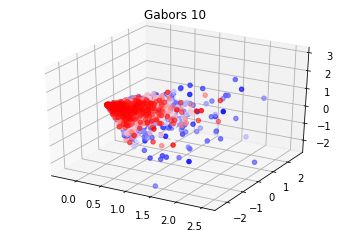

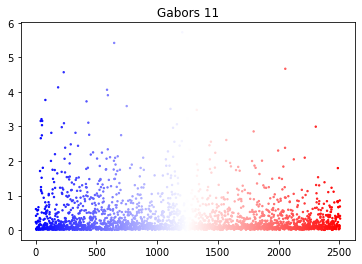

Dimension = 4


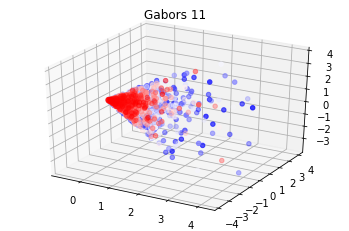

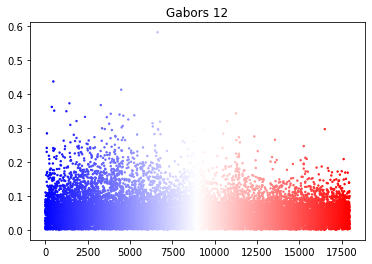

Dimension = 2


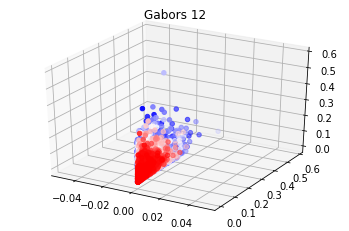

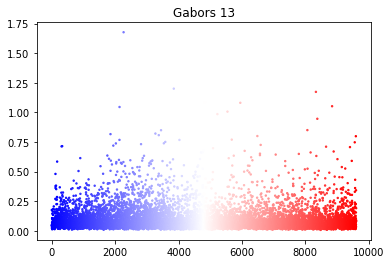

Dimension = 5


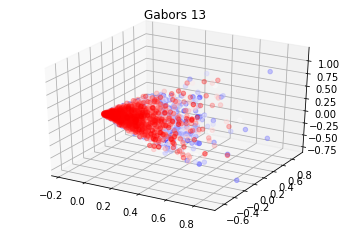

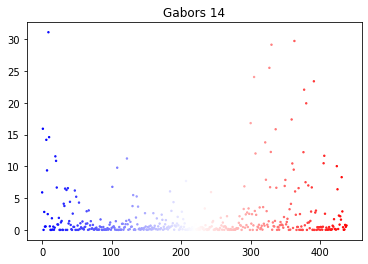

Dimension = 4


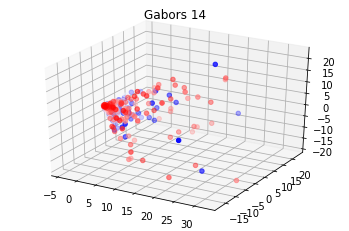

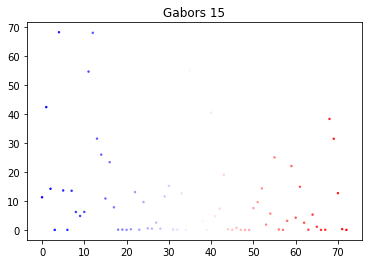

Dimension = 3


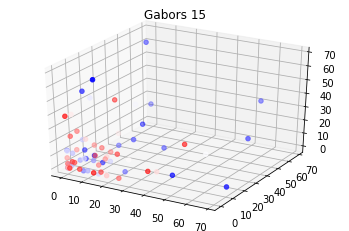

In [ ]:
# Gabors
tda_analysis(spike_trains_gabors, 'Gabors')

In [ ]:
def takens_plot_spikes(ts_arr, color, label, ax):
  spike_intervals = np.diff(ts_arr, n = 1)
  ts_embed = SingleTakensEmbedding(dimension = 5).fit_transform(spike_intervals)
  embed_3dim = PCA(n_components = 3).fit_transform(ts_embed) if ts_embed.shape[1] > 3 else ts_embed
  if embed_3dim.shape[1] == 2:
    embed_3dim = np.concatenate((np.zeros((embed_3dim.shape[0], 1), dtype = float), embed_3dim), axis = 1)
  N = embed_3dim.shape[0]  
  ax.scatter(embed_3dim[:, 0], embed_3dim[:, 1], embed_3dim[:, 2], c = color, label = label)
  return

def takens_plot_spikes_mean(ts_arr, color, label, ax):
  spike_intervals = np.diff(ts_arr, n = 1)
  ts_embed = SingleTakensEmbedding(dimension = 5).fit_transform(spike_intervals)
  embed_3dim = PCA(n_components = 3).fit_transform(ts_embed) if ts_embed.shape[1] > 3 else ts_embed
  if embed_3dim.shape[1] == 2:
    embed_3dim = np.concatenate((np.zeros((embed_3dim.shape[0], 1), dtype = float), embed_3dim), axis = 1)
  N = embed_3dim.shape[0]  
  embed_mean = np.mean(embed_3dim, axis = 0)
  print(embed_mean)
  ax.scatter(embed_mean[0], embed_mean[1], embed_mean[2], c = color, label = label)
  return

def ts_plot_spikes(ts_arr, color, label):
  spike_intervals = np.diff(ts_arr, n = 1)
  N = spike_intervals.shape[0]
  plt.scatter(np.arange(N), spike_intervals, s = 2, c = color, label = label)
  return

def takens_plot_multiple_angles(ts_list, labels = [0, 30, 60, 90, 120, 150]):
  # Plotting time series
  plt.figure()
  cmap = plt.get_cmap('rainbow')
  N = len(ts_list)
  for i, (ts_arr, label_name) in enumerate(zip(ts_list, labels)):
    ts_plot_spikes(ts_arr, cmap(i/N), label_name)
  plt.legend()
  plt.grid()
  plt.show()

  # Plotting Takens embedding
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  for i, (ts_arr, label_name) in enumerate(zip(ts_list, labels)):
    takens_plot_spikes(ts_arr, cmap(i/N), label_name, ax)
  plt.legend()
  plt.grid()
  plt.show()

  # Plotting Takens embedding mean
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  for i, (ts_arr, label_name) in enumerate(zip(ts_list, labels)):
    takens_plot_spikes_mean(ts_arr, cmap(i/N), label_name, ax)
  plt.legend()
  plt.grid()
  plt.show()

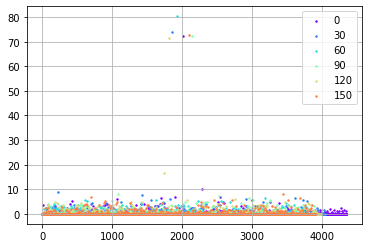

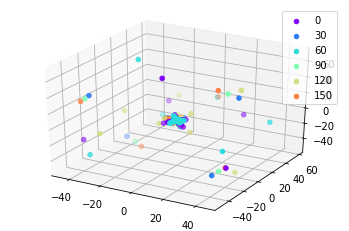

[ 1.17711952e-18 -2.17888938e-19  5.42305794e-18]


[-9.07420268e-18  1.23528129e-18 -1.11787799e-17]


[-2.32188172e-17  2.43861035e-17  6.59925331e-18]


[2.66959806e-17 7.01464217e-18 4.60001191e-17]


[-2.21823337e-17 -5.83605231e-18 -9.29063145e-18]


[-1.40654093e-17 -5.23888270e-18 -2.06905160e-18]


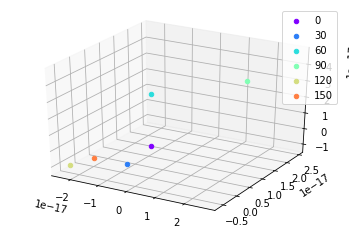

In [ ]:
takens_plot_multiple_angles(spike_trains_grating_orientation)